In [12]:
# Custom libraries
from dsu import plotter
from dsu import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


In [13]:
irisDf = pd.read_csv('../data/tesseract_extracted_text.csv')

In [14]:
numericalCols = irisDf.select_dtypes(include=[np.number]).columns
catCols = set(irisDf.columns) -set(numericalCols)

In [15]:
irisDf.describe()

,fname,text
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


In [16]:
irisDf.head()

,fname,text


In [17]:
irisDf.var()

fname   NaN
text    NaN
dtype: float64

In [18]:
irisDf.skew()

fname   NaN
text    NaN
dtype: float64

In [19]:
irisDf.corr()

""


In [20]:
# sample 10% of data
if len(irisDf) > 100000:
    samplesize =  int(0.1 *len(irisDf))
    sampleDf = irisDf.sample(samplesize)
else:
    sampleDf = irisDf

/home/nandhini/.virtualenvs/analytics/lib/python3.7/site-packages/seaborn/matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
/home/nandhini/.virtualenvs/analytics/lib/python3.7/site-packages/seaborn/matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/home/nandhini/.virtualenvs/analytics/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:2837: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


ValueError: zero-size array to reduction operation minimum which has no identity

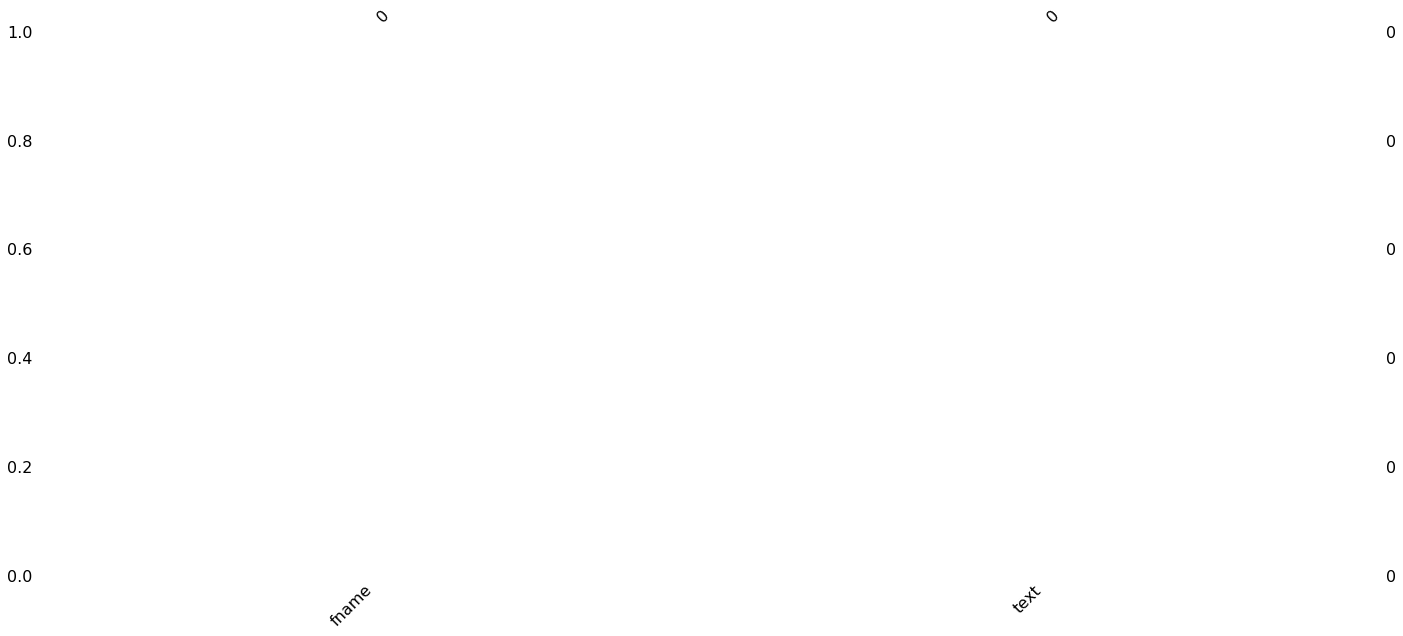

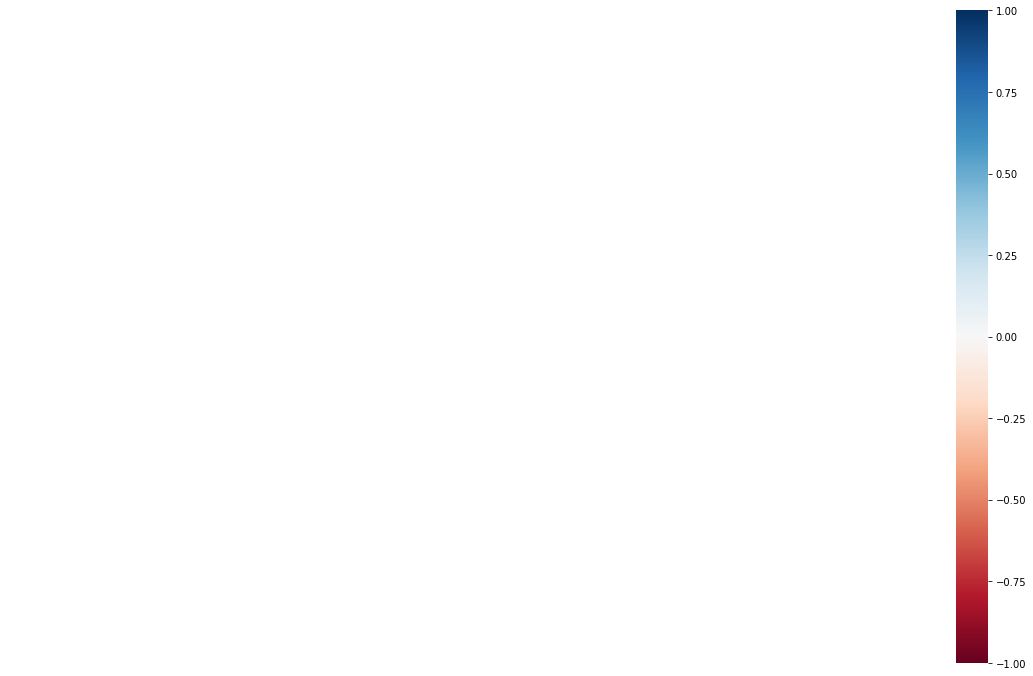

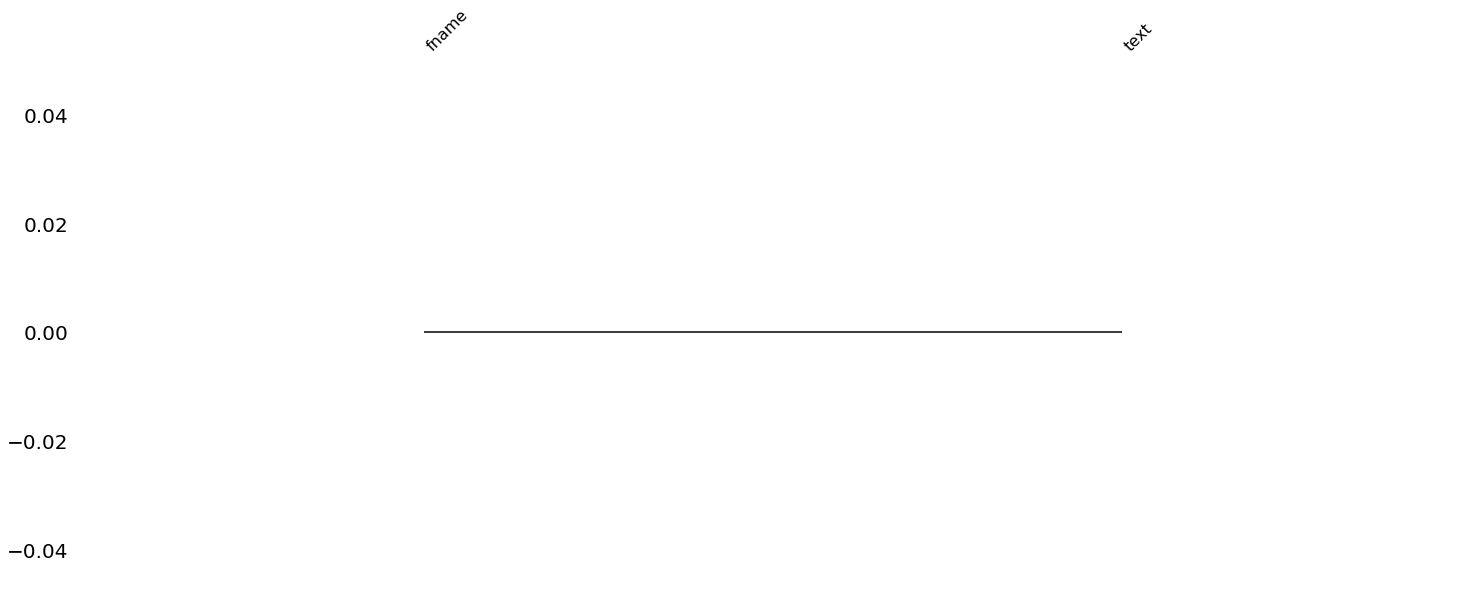

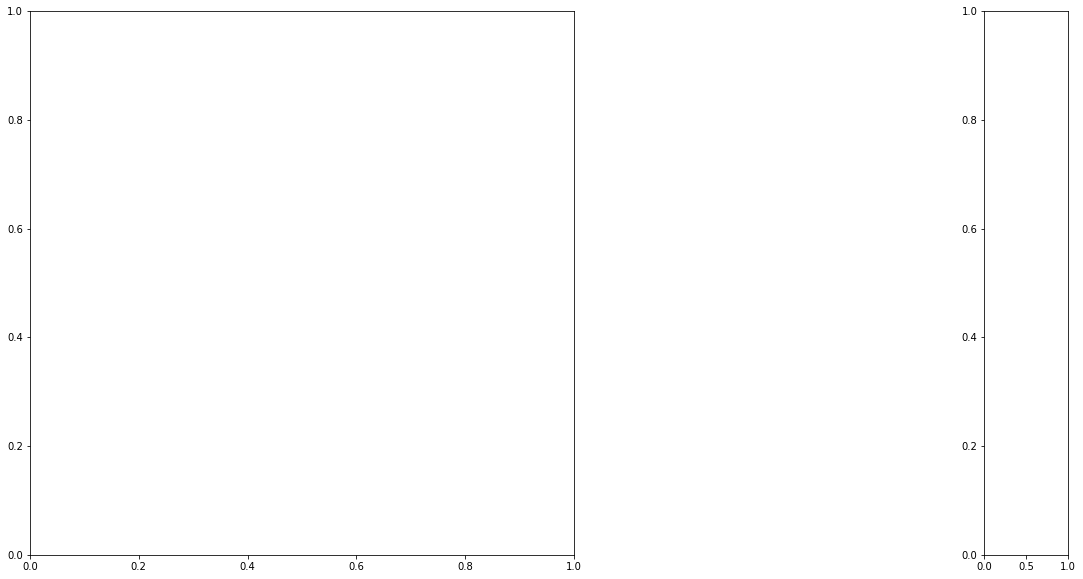

In [21]:
analyze.missing_values(sampleDf,)

In [ ]:
analyze.missing_values(sampleDf, groups = ['Class'])

In [22]:
import itertools
for combo in itertools.combinations(numericalCols, 2):
    analyze.correlation_analyze(sampleDf, combo[0], combo[1],
                                measures=['sepal_length', 'petal_length', 'petal_width', 'sepal_width'],
				check_linearity=True, trellis=True)

In [23]:
for col in numericalCols:
    for catCol in catCols:
        analyze.dist_analyze(sampleDf, col, category=catCol, kdeplot=True, bayesian_hist=True)


In [24]:
for catCol in catCols:
    for col in numericalCols:
        print(col, catCol)
        plotter.sb_violinplot(col, groupCol=catCol, dataframe=sampleDf)
        plotter.sb_show()
        

In [25]:
analyze.joint_dist_analyze(sampleDf, columns=numericalCols, categories=catCols)